In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [13]:
df = pd.read_csv("processed_rainfall_dataset.csv")
df.head()


,Temperature,Pressure,Humidity,Rainfall,WindSpeed,Rainfall Today,Rainfall Tomorrow
0,18.15,1007.40,46.5,0.6,22.0,0.0,0.0
1,16.25,1009.20,34.5,0.0,13.0,0.0,0.0
2,19.30,1008.15,34.0,0.0,22.5,0.0,0.0
3,18.60,1015.20,30.5,0.0,10.0,0.0,0.0
4,24.90,1008.40,57.5,1.0,13.5,0.0,0.0


In [14]:

print("Dataset Shape:", df.shape)

print("\nColumn Info:")
df.info()

print("\nBasic Statistics:")
display(df.describe())


Dataset Shape: (126354, 7)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126354 entries, 0 to 126353
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Temperature        126354 non-null  float64
 1   Pressure           126354 non-null  float64
 2   Humidity           126354 non-null  float64
 3   Rainfall           126354 non-null  float64
 4   WindSpeed          126354 non-null  float64
 5   Rainfall Today     126354 non-null  float64
 6   Rainfall Tomorrow  126354 non-null  float64
dtypes: float64(7)
memory usage: 6.7 MB

Basic Statistics:


,Temperature,Pressure,Humidity,Rainfall,WindSpeed,Rainfall Today,Rainfall Tomorrow
count,126354.000000,126354.000000,126354.000000,126354.000000,126354.000000,126354.000000,126354.000000
mean,17.959031,1016.449140,59.939582,2.344869,16.670541,0.223277,0.221418
std,6.198719,6.998425,18.176909,8.507748,7.638495,0.416444,0.415203
min,-1.300000,979.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.150000,1011.700000,48.500000,0.000000,11.000000,0.000000,0.000000
50%,17.600000,1016.400000,61.000000,0.000000,16.000000,0.000000,0.000000
75%,22.500000,1021.150000,73.000000,0.800000,21.000000,0.000000,0.000000
max,43.400000,1040.050000,100.000000,371.000000,80.500000,1.000000,1.000000


In [15]:
features = ["Pressure", "Temperature", "Humidity", "WindSpeed", "Rainfall Today"]
df = df[features + ["Rainfall Tomorrow"]] 

# Preview
print("Cleaned Dataset Preview:")
display(df.head())

print("Class Distribution:")
print(df["Rainfall Tomorrow"].value_counts())

Cleaned Dataset Preview:


,Pressure,Temperature,Humidity,WindSpeed,Rainfall Today,Rainfall Tomorrow
0,1007.40,18.15,46.5,22.0,0.0,0.0
1,1009.20,16.25,34.5,13.0,0.0,0.0
2,1008.15,19.30,34.0,22.5,0.0,0.0
3,1015.20,18.60,30.5,10.0,0.0,0.0
4,1008.40,24.90,57.5,13.5,0.0,0.0


Class Distribution:
Rainfall Tomorrow
0.0    98377
1.0    27977
Name: count, dtype: int64


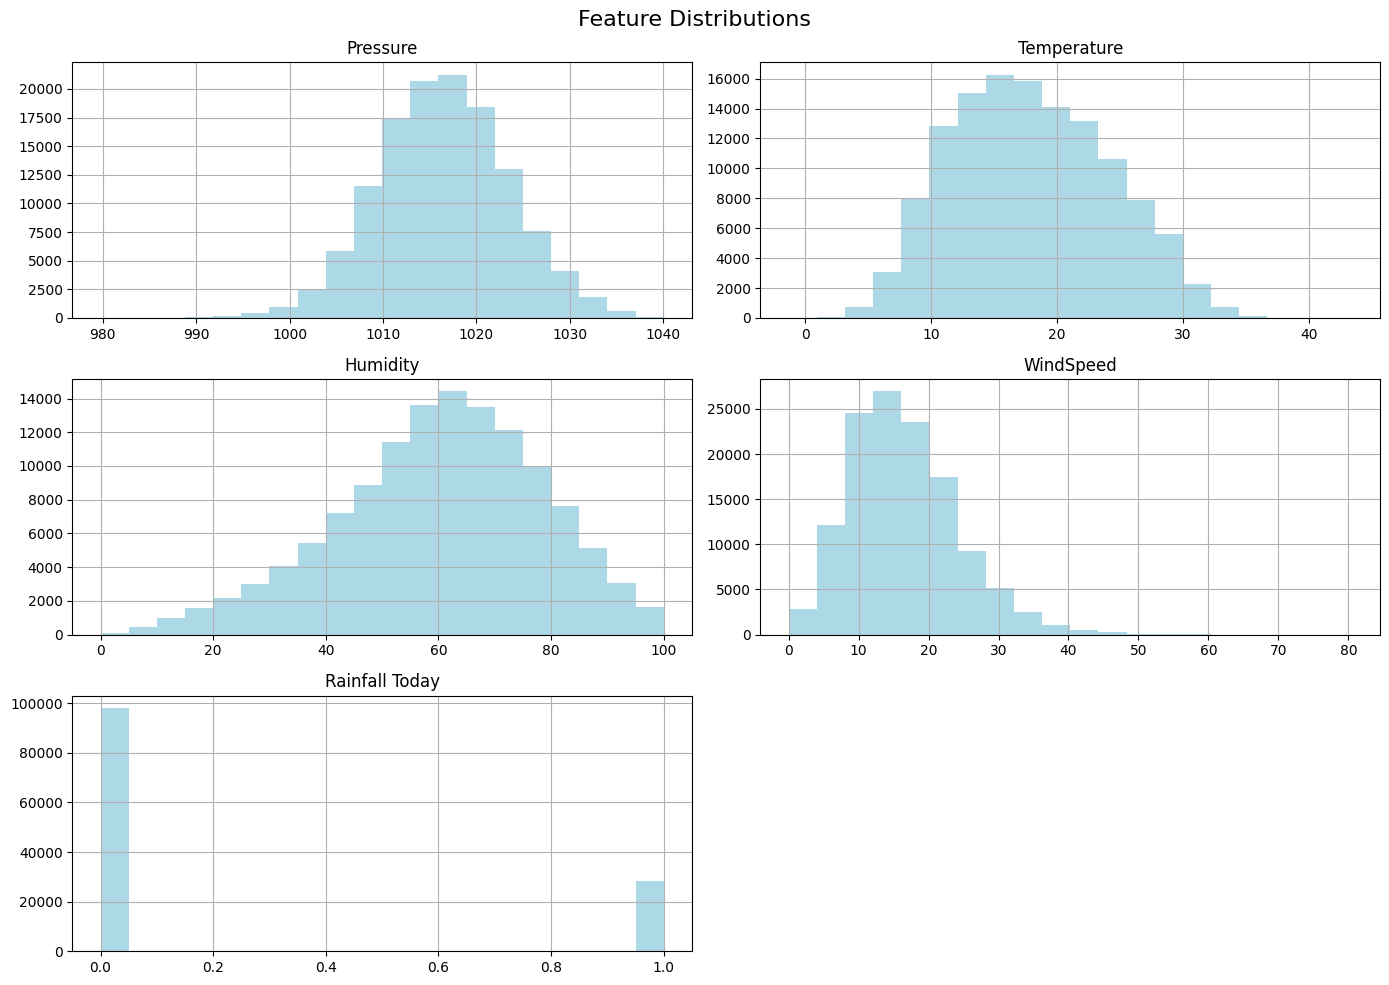

In [16]:
df[features].hist(bins=20, figsize=(14, 10), color='lightblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


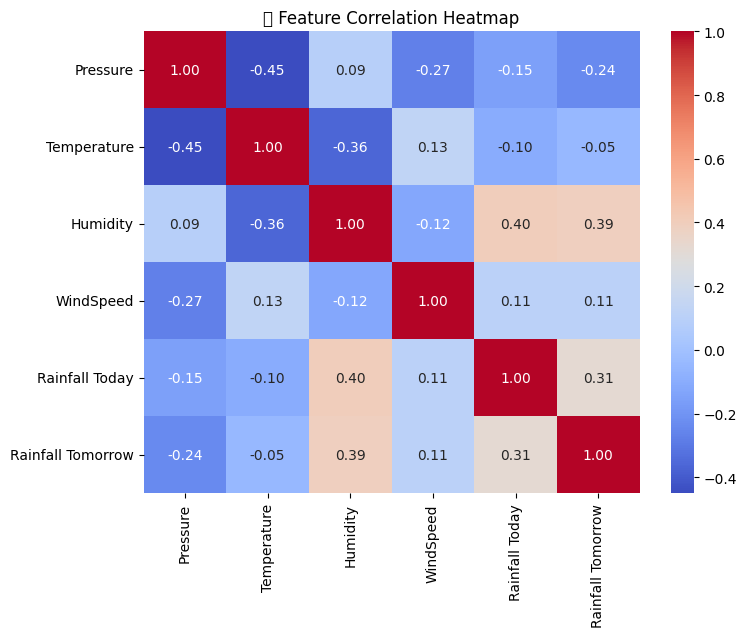

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Feature Correlation Heatmap")
plt.show()


In [18]:
X = df[features]
y = df["Rainfall Tomorrow"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (101083, 5)
Test shape: (25271, 5)


In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8260

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     19676
         1.0       0.66      0.43      0.52      5595

    accuracy                           0.83     25271
   macro avg       0.76      0.69      0.71     25271
weighted avg       0.81      0.83      0.81     25271



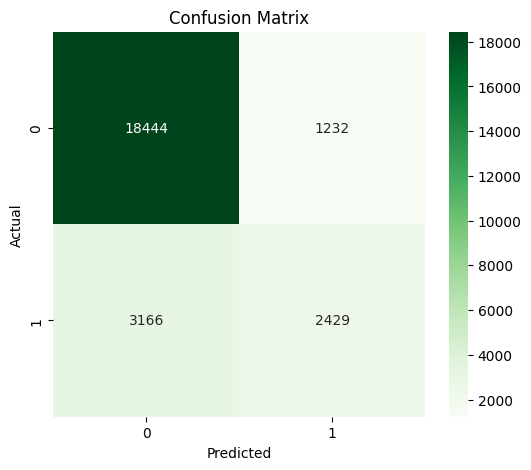

In [20]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [21]:
joblib.dump(model, "rainfall_model.pkl")
print("Model saved as 'rainfall_model.pkl'")


Model saved as 'rainfall_model.pkl'


In [22]:
from sklearn.linear_model import LogisticRegression

# Train
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg, zero_division=0))


Logistic Regression Accuracy: 0.8279450753828499
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     19676
         1.0       0.69      0.40      0.51      5595

    accuracy                           0.83     25271
   macro avg       0.77      0.68      0.70     25271
weighted avg       0.81      0.83      0.81     25271



In [23]:
joblib.dump(logreg_model, "logreg_rainfall_model.pkl")
print("Logistic Regression model saved as logreg_rainfall_model.pkl")

Logistic Regression model saved as logreg_rainfall_model.pkl


In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Train
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn, zero_division=0))



KNN Accuracy: 0.8159154762375845
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.92      0.89     19676
         1.0       0.62      0.45      0.52      5595

    accuracy                           0.82     25271
   macro avg       0.74      0.68      0.70     25271
weighted avg       0.80      0.82      0.80     25271



In [26]:
joblib.dump(knn_model, "knn_rainfall_model.pkl")
print(" KNN model saved as knn_rainfall_model.pkl")


 KNN model saved as knn_rainfall_model.pkl
